In [3]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [4]:
# Lendo os dados da planilha

df = pd.read_excel('/content/C+¦pia de aprovacao_alunos (1).xlsx')
df.head()

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76


In [5]:
# Conhecendo o tamanho do dataframe

df.shape

(27, 3)

In [ ]:
# Conferindo se há valores nulos e se a tipagem está de acordo com o esperado

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   UF        27 non-null     object
 1   ano_2015  27 non-null     int64 
 2   ano_2016  27 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 776.0+ bytes


In [32]:
# Criando as variaveis que vão ser utilizadas para treinar e t

Y = df['ano_2016']
# Criando uma constante para que o valor de R² seja centralizado
X = sm.add_constant(df['ano_2015'])

In [34]:
# Criando um ajuste com base nas variaveis de treino

resultado_regressao = sm.OLS(Y,X).fit()
# Printando um sumario com os resultados do treino
print(resultado_regressao.summary())
# Lembrando que R-squared varia de 0-1 quanto maior, melhor.

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Fri, 30 Jun 2023   Prob (F-statistic):           3.02e-10
Time:                        10:23:31   Log-Likelihood:                -58.476
No. Observations:                  27   AIC:                             121.0
Df Residuals:                      25   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3143      6.880      1.645      0.1

In [35]:
# Criando uma coluna com os valores previstos

df['y_previsto'] = resultado_regressao.predict()
df['y_previsto'] = round(df['y_previsto']).astype(int)

In [36]:
df.head()

,UF,ano_2015,ano_2016,y_previsto
0,Rondonia,77,85,78
1,Acre,79,81,80
2,Amazonas,83,85,83
3,Roraima,81,82,82
4,Para,73,76,75


In [37]:
df['residuo'] = df['y_previsto'] - df['ano_2016']
df.head()

,UF,ano_2015,ano_2016,y_previsto,residuo
0,Rondonia,77,85,78,-7
1,Acre,79,81,80,-1
2,Amazonas,83,85,83,-2
3,Roraima,81,82,82,0
4,Para,73,76,75,-1


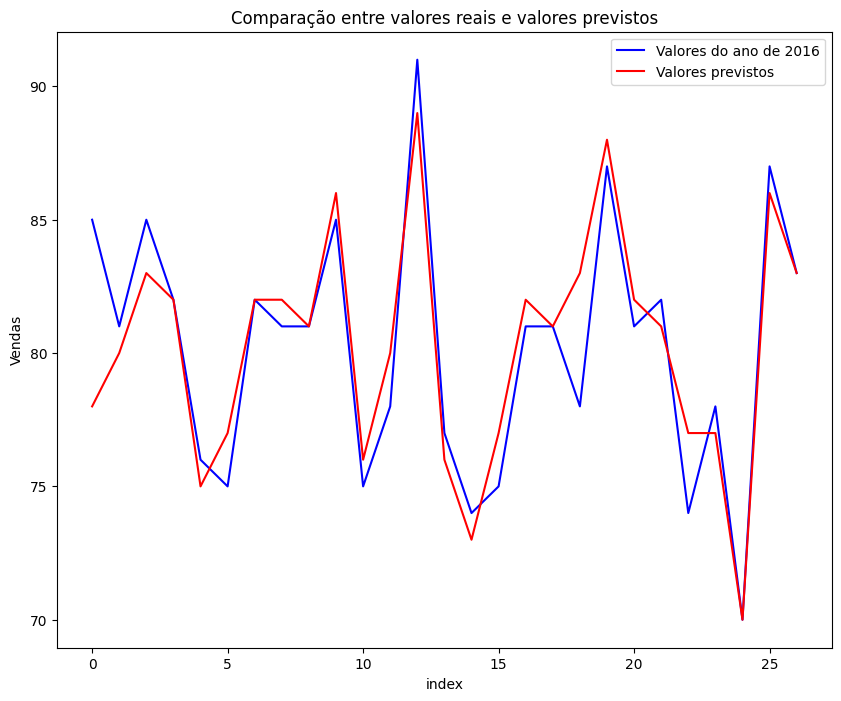

In [39]:
# Comparando valores reais (valores de df['ano_2016']) com valores previstos (df[y_previsto])

# Foi criada uma variável c para ser o index do gráfico.
c = [i for i in range(0, len(df['y_previsto']), 1)]
# Aumentando o tamanho do gráfico
fig = plt.figure(figsize=(10,8))
# Plotando os dados de df['ano_2016'] na cor azul e com a legenda 'Valores do ano de 2016'
plt.plot(c, df['ano_2016'], color="blue", label='Valores do ano de 2016')
# Plotando os dados de df['y_previsto'] na cor vermelha e com a legenda 'Valores previstos'
plt.plot(c, df['y_previsto'], color = "red", label='Valores previstos')
# Criando um título para o gráfico
plt.title('Comparação entre valores reais e valores previstos')
# Inserindo legenda no gráfico
plt.legend()
# Alterando a legenda dos eixos
plt.xlabel("index")
plt.ylabel("Vendas");